# Benefits of Feature Mapping and Fixed Basis

**Learning Outcomes**
1. Understand how to perform a simple feature mapping
2. Appreciate the benefits of moving from one input space to another feature space
3. Appreciate the ability of using a linear classifier on a non-linear problem via fixed basis
4. Understand the limitation of fixed basis and their non-additivity


In this exercise you will see first-hand the effect of mapping a non-linear input space into  new feature space, where the non-linearly separable classes are turned into linearly separable classes via a simple feature mapping


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate the Data

In [3]:
N = 70 #15

t = np.linspace(0, 2*np.pi, num = N)
a = 0.5
b = 0.5
r = 1
x = a + r * np.cos(t)
y = b + r * np.sin(t)

mn, mx = a-3*r, b+3*r
noise = 0.5*r

Y = np.random.normal(y,noise)
X = np.random.normal(x,noise)


## Plot the classes

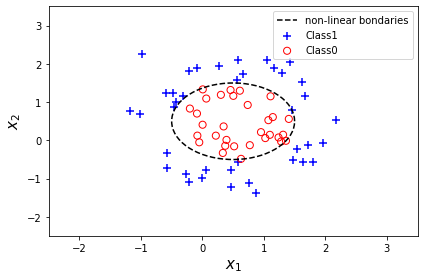

In [4]:
# plot the non-linear separator of the classes
ax = plt.axes()
ax.set_ylim(mn,mx)
ax.set_xlim(mn,mx)
ax.plot(x,y,'--k', label = 'non-linear bondaries')
#plt.plot(X, Y,'.b')

ind0 = (X-a)**2 + (Y-b)**2 <   r**2   #condition for Class0
ind1 = (X-a)**2 + (Y-b)**2 >=  r**2   #condition for Class1

C0 = [X[ind0],Y[ind0]]       # Actual Class0
C1 = [X[ind1],Y[ind1]]       # Actual Class1

plt.scatter(C1[0],C1[1], s=50,color='b',    marker='+', label= 'Class1')
plt.scatter(C0[0],C0[1], s=50,color='none', marker='o', label= 'Class0', edgecolor='red')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend()
plt.tight_layout()

data = np.array([X,Y, ind0*1 ])


## Perform Feature Mapping

Now map the data into a new space to linearise the classes’ reparability

1. $x_1 = x^2 - 2ax$

2. $y_1 = y^2 - 2by$

These are deduced from the following equation

$(x-a)^2 + (y-b)^2  = r^2$

The linear separator can be inferred via isolating the constants on the above equation.

$r^2-a^2-b^2$

See the unit script for more details.

In [5]:
# Ok so now let us map to a new space that will make everything linear

X1 = X**2 - 2*a*X                #  (x1-a)^2 + (x2-b)^2  = r^2
Y1 = Y**2 - 2*b*Y                #  (x1-a)^2 + (x2-b)^2  = r^2

C1_ = [X1[ind1],Y1[ind1]]        # Actual Class1
C0_ = [X1[ind0],Y1[ind0]]        # Actual Class0

Let us now plot the results of the mapped space

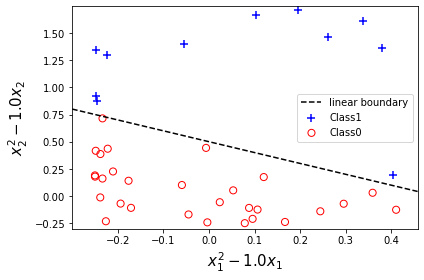

In [6]:
xlim = [np.min(X1)-0.05, np.max(X1)-2.1]
ylim = [np.min(Y1)-0.05, np.max(Y1)-1.5]

plt.xlim(xlim)
plt.ylim(ylim)

plt.scatter(C1_[0],C1_[1], s=50,color='b',    marker='+', label= 'Class1')
plt.scatter(C0_[0],C0_[1], s=50,color='none', marker='o', label= 'Class0', edgecolor='red')

t = np.linspace(xlim[0], xlim[1], num = N)

y2 = -t + r**2-a**2-b**2                         # obtained by isolating the constants in equation x1 (x1-a)^2 + (x2-b)^2  = r^2
plt.plot(t,y2, '--k', label = 'linear boundary') # for the mapped data


plt.xlabel('$x_1^2 - {}x_1$'.format(2*a), fontsize=15)
plt.ylabel('$x_2^2 - {}x_2$'.format(2*b), fontsize=15)

plt.legend()
plt.tight_layout()

## Your turn

Below we generate some data that you might want to try if you can render it from a non-linearly separable input space into another linearly separable feature space.

It is a trial and error process. Of course the way we generated the data should give you a clue here, but in real life scenarios you might want to:

1. Try a linear model first if the data is in high dimensional space
2. Try different mapping and see if the performance is improved
3. Use a non-linear models if a linear model with fixed basis does not work


Generate a non-linearly separable binary classification dataset and plot its two classes.

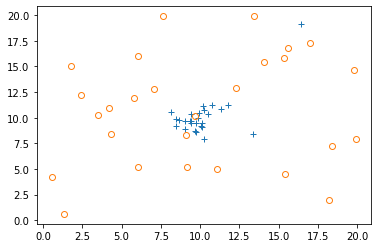

In [7]:
mu, cov = [10, 10], [[1, 0], [0, 1]]

filt = 0.5   #50%
N1 = int(5000*filt/100)
N2 = int(400 *filt/100)
N3 = int(5400*filt/100)

GaussX, GaussY = np.random.multivariate_normal(mu,cov,N1).T
NoiseX, NoiseY = np.random.random((2,N2))*20

NoiseyGaussX, NoiseyGaussY  = np.concatenate((GaussX,NoiseX)), np.concatenate((GaussY,NoiseY))
UniformX,     UniformY      = np.random.random((2,N3))*20

plt.plot(NoiseyGaussX, NoiseyGaussY, '+') 
plt.plot(UniformX,     UniformY,     'o', mfc='none') 


In [9]:
N3

27

In [8]:
dataC1= np.vstack((NoiseyGaussX, NoiseyGaussY, np.zeros((N3)))).T # add labels
dataC2= np.vstack((UniformX,     UniformY,     np.ones((N3)))).T # add labels

data = np.concatenate((dataC1,dataC2))
df = pd.DataFrame(data,columns=['x1','x2','Class'])

Let us try to use the log and other simple feature mappings to see if we can render the features linearly separable.

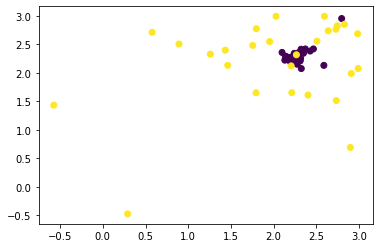

In [13]:
x1 = data[:,0]
x2 = data[:,1]
c  = data[:,2]


X1 = np.log(x1)  #**2-x1  try other such as polynomials
X2 = np.log(x2)  #-x2 or x2-10

plt.scatter(X1, X2,c=c)

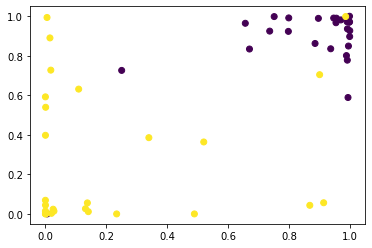

In [65]:
x1 = data[:,0]
x2 = data[:,1]
c  = data[:,2]

var = 4
mu = 10

X1 = np.exp((-(x1-mu)**2)/(2*var))  #try other such as polynomials
X2 = np.exp((-(x2-mu)**2)/(2*var)) #or x2-10

plt.scatter(X1, X2,c=c)